In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib

# Перевірка версії
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.20.0


In [3]:
# Налаштування
data_dir = pathlib.Path("dataset") # Шлях до папки з фото
batch_size = 32
img_height = 224 # Стандарт для багатьох мереж
img_width = 224

# Створення тренувального набору (80% даних)
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Створення валідаційного (тестового) набору (20% даних)
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print("Знайдені класи:", class_names) # Має вивести ['armchair', 'door', 'table']

# Оптимізація продуктивності
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 166 files belonging to 3 classes.
Using 133 files for training.
Found 166 files belonging to 3 classes.
Using 33 files for validation.
Знайдені класи: ['armchair', 'door', 'table']


In [4]:
num_classes = len(class_names)

model_custom = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)), # Нормалізація
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax') # Вихідний шар
])

model_custom.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

model_custom.summary()

# Навчання власної моделі
epochs = 10
history_custom = model_custom.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\preprocessing\data_layer.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 224, 224, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,446,627 (24.59 MB)

 Trainable params: 6,446,627 (24.59 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 892ms/step - accuracy: 0.3308 - loss: 1.6290 - val_accuracy: 0.3939 - val_loss: 1.2762
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 670ms/step - accuracy: 0.4586 - loss: 1.1352 - val_accuracy: 0.3636 - val_loss: 1.1032
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 565ms/step - accuracy: 0.4737 - loss: 0.9846 - val_accuracy: 0.3030 - val_loss: 1.0817
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 697ms/step - accuracy: 0.6617 - loss: 0.8180 - val_accuracy: 0.4242 - val_loss: 1.1330
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 516ms/step - accuracy: 0.6992 - loss: 0.7543 - val_accuracy: 0.5152 - val_loss: 1.2652
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 573ms/step - accuracy: 0.7068 - loss: 0.6781 - val_accuracy: 0.5152 - val_loss: 1.0226
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 698ms/step - accuracy: 0.8271 - loss: 0.5150 - val_accuracy: 0.5758 - val_loss: 0.9643
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 569ms/step - accuracy: 0.8947 - loss: 0.3690 - val_accuracy: 0.5152 - val_loss

In [5]:
# Завантажуємо базову модель (навчену на ImageNet)
base_model = tf.keras.applications.MobileNetV2(input_shape=(img_height, img_width, 3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False # Заморожуємо ваги

# Додаємо "голову" для класифікації твоїх 3 класів
model_tl = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)), # Мобілнет очікує [0,1] або [-1,1]
  base_model,
  layers.GlobalAveragePooling2D(),
  layers.Dropout(0.2),
  layers.Dense(num_classes, activation='softmax')
])

model_tl.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

model_tl.summary()

# Навчання (зазвичай швидше і точніше)
history_tl = model_tl.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 13s 1us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │           3,843 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,261,827 (8.63 MB)

 Trainable params: 3,843 (15.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.6090 - loss: 0.9491 - val_accuracy: 0.8485 - val_loss: 0.5415
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.7669 - loss: 0.5959 - val_accuracy: 0.9394 - val_loss: 0.3497
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.8647 - loss: 0.3859 - val_accuracy: 0.9697 - val_loss: 0.2289
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.9699 - loss: 0.2197 - val_accuracy: 0.9697 - val_loss: 0.1676
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9850 - loss: 0.1602 - val_accuracy: 0.9697 - val_loss: 0.1297
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.9774 - loss: 0.1216 - val_accuracy: 0.9697 - val_loss: 0.1124
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.9925 - loss: 0.0997 - val_accuracy: 0.9697 - val_loss: 0.1034
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 1.0000 - loss: 0.0821 - val_accuracy: 0.9697 - val_loss: 0.0950
Epoch 9/10
5/5

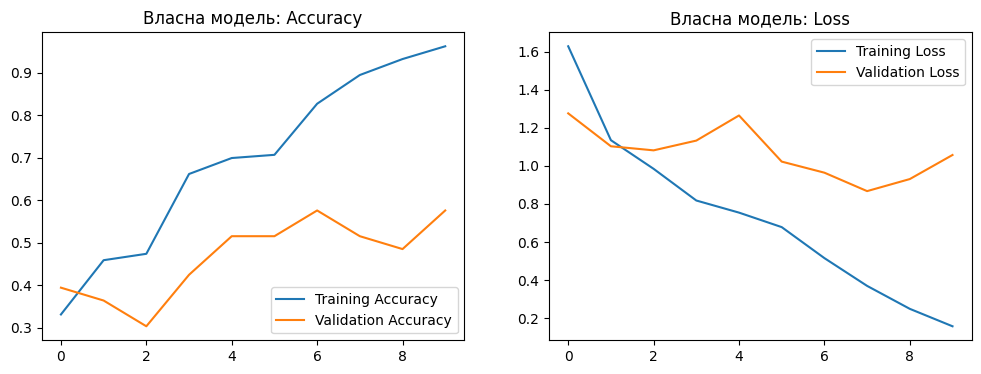

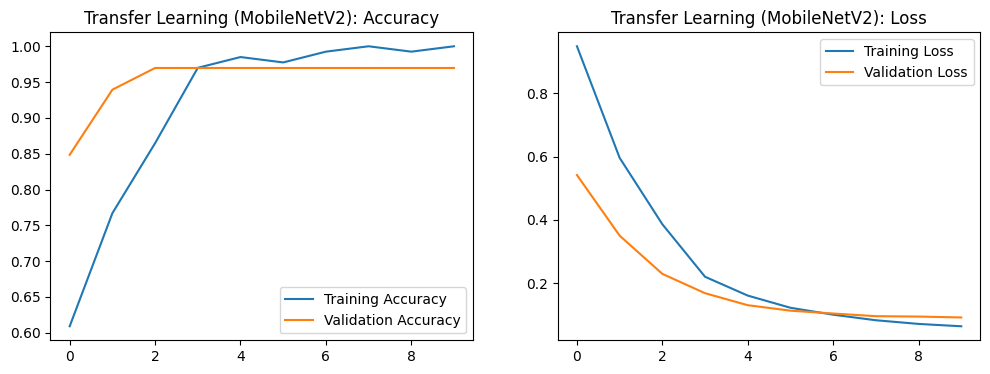

In [6]:
def plot_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title(f'{title}: Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title(f'{title}: Loss')
    plt.show()

plot_history(history_custom, "Власна модель")
plot_history(history_tl, "Transfer Learning (MobileNetV2)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 753ms/step


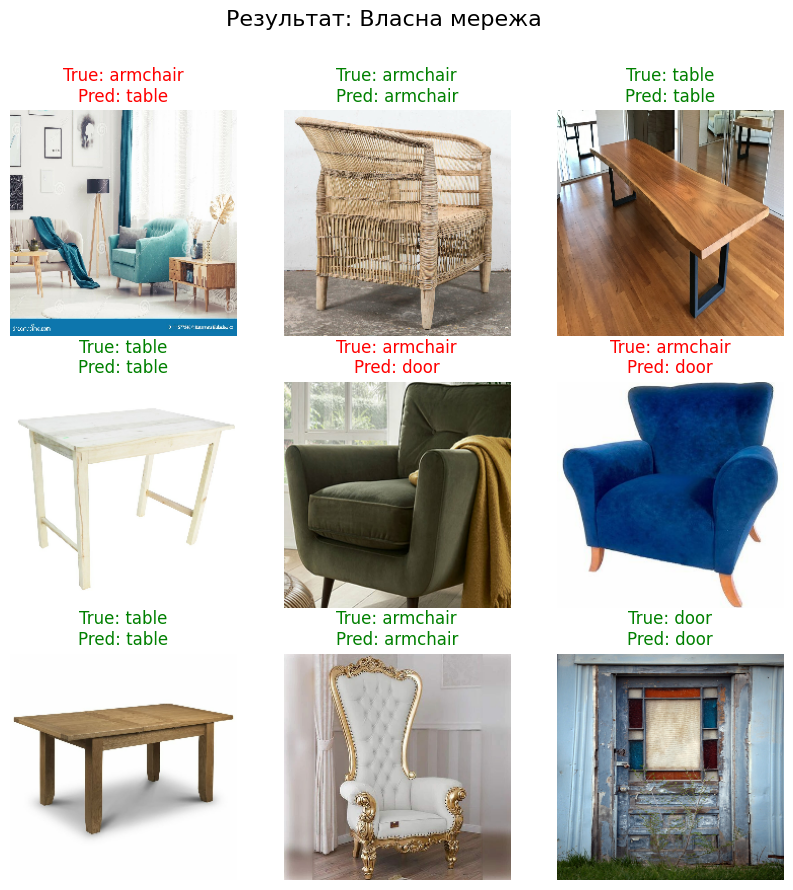

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


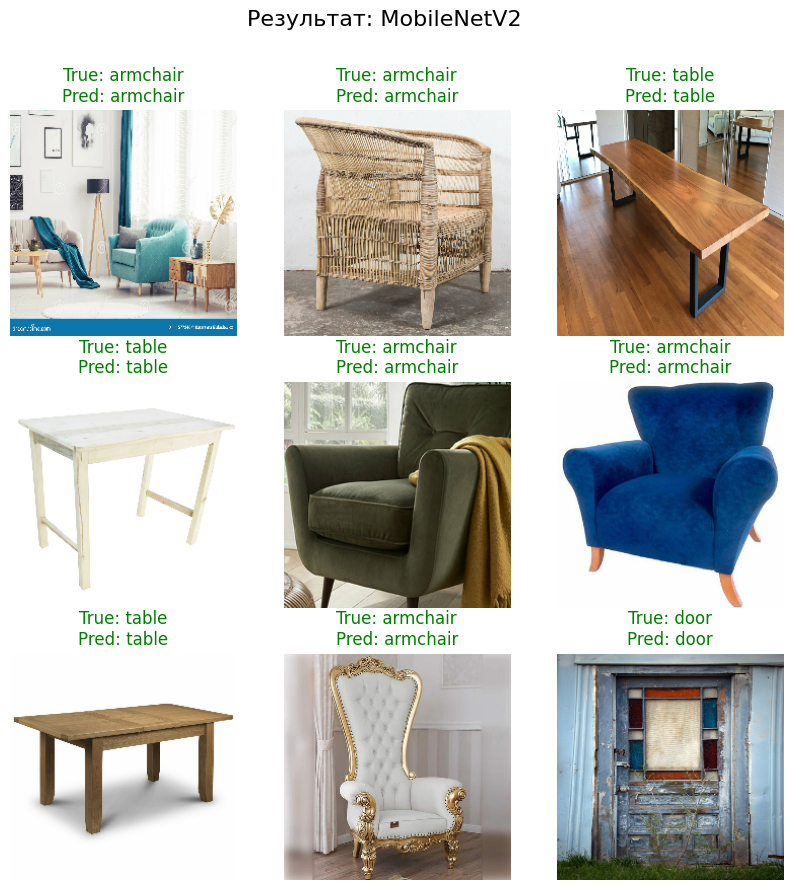

In [20]:
def visualize_results(model, dataset, title):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        predictions = model.predict(images)
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            
            true_label = class_names[labels[i]]
            pred_label = class_names[np.argmax(predictions[i])]
            
            color = 'green' if true_label == pred_label else 'red'
            
            plt.title(f"True: {true_label}\nPred: {pred_label}", color=color)
            plt.axis("off")
    plt.suptitle(f"Результат: {title}", fontsize=16)
    plt.show()

# Виклик для обох моделей
visualize_results(model_custom, val_ds, "Власна мережа")
visualize_results(model_tl, val_ds, "MobileNetV2")